In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pokemon = pd.read_csv('~/data/cbcpv/pokemon/pokemon.csv', index_col=0, encoding='cp1252')
pokemon.sample(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
107,Hitmonchan,Fighting,NaN,455,50,105,79,35,110,76,1,False
133,Eevee,Normal,NaN,325,55,55,50,45,65,55,1,False
26,Raichu,Electric,NaN,485,60,90,55,90,80,110,2,False
151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


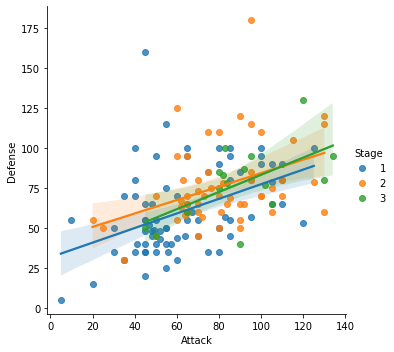

In [5]:
sns.lmplot(x='Attack', y='Defense', data=pokemon, fit_reg=True, hue='Stage')

<AxesSubplot:>

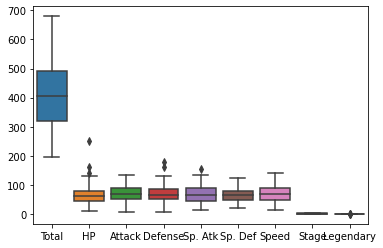

In [6]:
sns.boxplot(data=pokemon)

<AxesSubplot:>

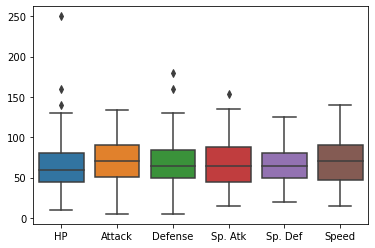

In [7]:
stats_pokemon=pokemon.drop(['Total','Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_pokemon)

In [8]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

Text(0.5, 1.0, 'Attack by Type')

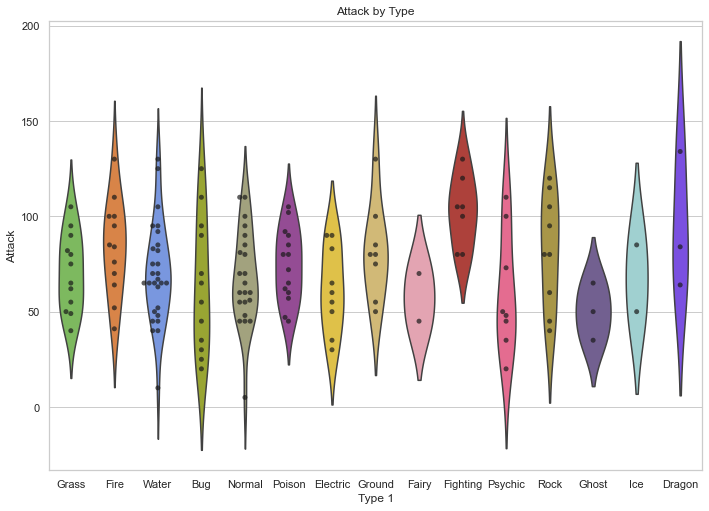

In [7]:
sns.set(style='whitegrid', rc={
    'figure.figsize':(11.7, 8.27)
})
pkmn_type_color=[
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8',  # Dragon
]
sns.violinplot(
    x='Type 1',
    y='Attack',
    data=pokemon,
    inner=None,
    palette=pkmn_type_color
)
sns.swarmplot(
    x='Type 1',
    y='Attack',
    data=pokemon,
    color='k',
    alpha=.7
)

plt.title('Attack by Type')

In [11]:
stats_pokemon.sample()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
128,Tauros,Normal,NaN,75,100,95,40,70,110


In [12]:
melted_pokemon=pd.melt(
    stats_pokemon,
    id_vars=['Name', 'Type 1', 'Type 2'], # 保留特征
    var_name='Stat' # 其余特征规定到此列
)
melted_pokemon.sample(10)

,Name,Type 1,Type 2,Stat,value
291,Kabutops,Rock,Water,Attack,115
406,Marowak,Ground,NaN,Defense,110
821,Machoke,Fighting,NaN,Speed,45
129,Gyarados,Water,Flying,HP,95
281,Lapras,Water,Ice,Attack,85
586,Vaporeon,Water,NaN,Sp. Atk,110
483,Nidoqueen,Poison,Ground,Sp. Atk,75
93,Gengar,Ghost,Poison,HP,60
791,Vulpix,Fire,NaN,Speed,65
481,Nidoran‰ªÛ,Poison,NaN,Sp. Atk,40


In [13]:
melted_pokemon['Stat'].unique()

array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype=object)

<AxesSubplot:xlabel='Stat', ylabel='value'>

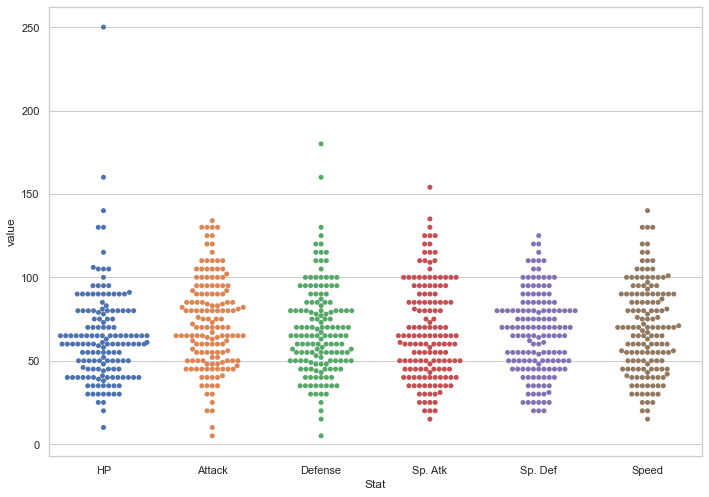

In [14]:
sns.swarmplot(x='Stat', y='value', data=melted_pokemon)

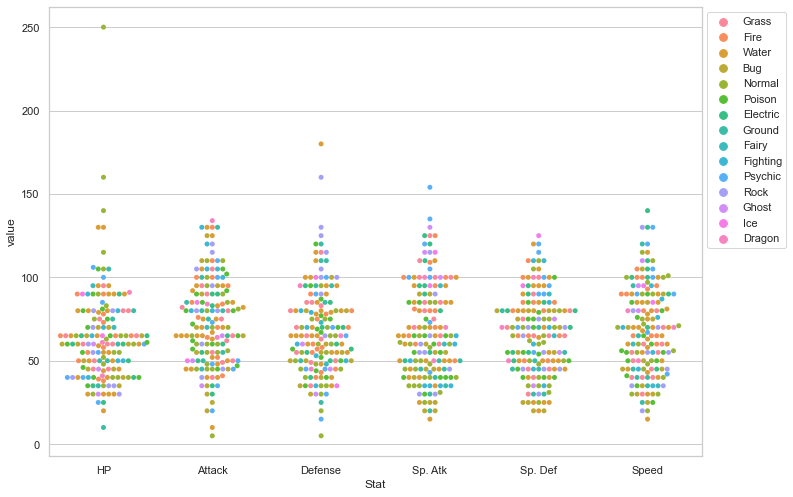

In [15]:
sns.swarmplot(
    x='Stat',
    y='value',
    data=melted_pokemon,
    hue='Type 1'
)
plt.legend(bbox_to_anchor=(1, 1), loc=2)